In [2]:
import torch
import torch.nn as nn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [64]:
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [98]:
import scipy.io
from scipy import stats

In [65]:
# from __future__ import print_function
# from matplotlib import pyplot as plt
# # get_ipython().magic(u'matplotlib auto')
# import tensorflow as tf
# # import tensorflow.compat.v1 as tf
# # tf.disable_v2_behavior()
# # import torch
# from tensorflow import keras
# # config = tf.ConfigProto( device_count = {'GPU': 0 } )
# # sess = tf.Session(config=config)
# # keras.backend.set_session(sess)
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
# from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
# from tensorflow import reshape
# from keras.utils import np_utils
# from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
# from tensorflow.keras.layers import SeparableConv1D
# from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
# from tensorflow.keras.regularizers import l2,l1
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.callbacks import CSVLogger
# from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
# from scipy.io import loadmat
# import numpy as np
# import pandas as pd
# import seaborn as sns
# from numpy import mean
# from numpy import std
# # import coremltools
# # from torch import nn, optim
# # import torch.nn.functional as F
# import scipy.io
# from scipy import stats
# from IPython.display import display, HTML
# from tensorflow.keras import optimizers
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import GRU, SimpleRNN
# from tensorflow.keras.layers import TimeDistributed
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn import preprocessing

In [66]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [67]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [68]:
# pip install mat73

In [69]:
# import mat73

In [70]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [71]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [72]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [73]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [74]:
N_FEATURES = 8

In [75]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [76]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train

In [77]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [78]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [79]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [80]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_WOR_BP_D2/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/'
# naveen_prep
path='/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/'
# olsson_prep
# path='/media/naveen/nav/mat_codes/BioPatRec/olsson_prep_WOR_BP_D2/Total_process_TT/'

In [81]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_WOR_BP_D2_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_seg_CW_WOR_BP_D2_train'+'.'+'csv'
# naveen_path
file_path_train=path+'Biopatrec_26c_17s_LP_wave_train'+'.'+'csv'
# olsson_path
# file_path_train=path+'Biopatrec_olsson_WOR_BP_D2_train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/Biopatrec_26c_17s_LP_wave_train.csv


In [82]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_WOR_BP_D2_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_seg_CW_WOR_BP_D2_test'+'.'+'csv'
# naveen_path
file_path_test=path+'Biopatrec_26c_17s_LP_wave_test'+'.'+'csv'
# olsson_path
# file_path_test=path+'Biopatrec_olsson_WOR_BP_D2_test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/Biopatrec_26c_17s_LP_wave_test.csv


In [83]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 5304000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02943,0.03246,1.00000
1,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02942,0.03245,1.00000
2,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
3,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
4,0.03450,0.04516,0.03173,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
5,0.03450,0.04516,0.03173,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
6,0.03451,0.04516,0.03173,0.03033,0.02866,0.02574,0.02942,0.03244,1.00000
7,0.03451,0.04516,0.03174,0.03032,0.02866,0.02574,0.02942,0.03244,1.00000
8,0.03451,0.04516,0.03174,0.03032,0.02866,0.02574,0.02942,0.03244,1.00000
9,0.03451,0.04516,0.03175,0.03032,0.02866,0.02574,0.02942,0.03243,1.00000


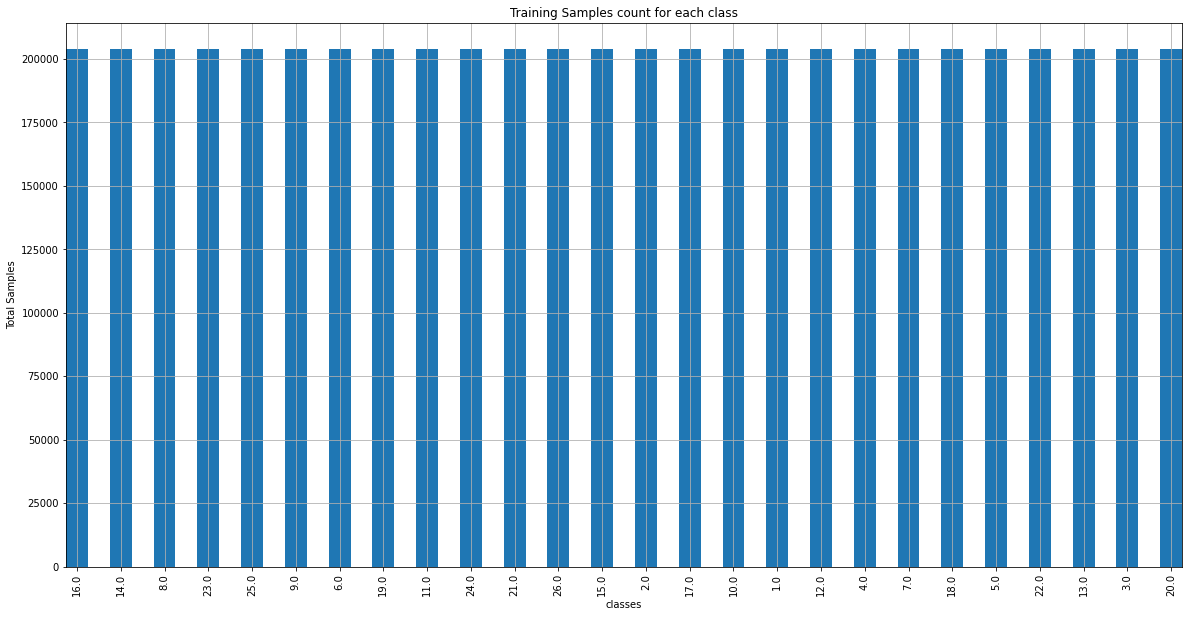

In [84]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [85]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 2652000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03051,0.04162,0.02142,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
1,0.03037,0.04162,0.02144,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
2,0.03020,0.04162,0.02145,0.03619,0.03280,0.02426,0.02407,0.03174,1.00000
3,0.03000,0.04162,0.02146,0.03618,0.03280,0.02426,0.02408,0.03174,1.00000
4,0.02982,0.04162,0.02147,0.03617,0.03279,0.02426,0.02408,0.03174,1.00000
5,0.02980,0.04163,0.02148,0.03617,0.03279,0.02426,0.02408,0.03173,1.00000
6,0.02980,0.04163,0.02149,0.03616,0.03278,0.02426,0.02408,0.03173,1.00000
7,0.02967,0.04163,0.02150,0.03615,0.03278,0.02426,0.02409,0.03173,1.00000
8,0.02967,0.04162,0.02152,0.03614,0.03277,0.02427,0.02409,0.03173,1.00000
9,0.02995,0.04162,0.02153,0.03614,0.03277,0.02427,0.02409,0.03173,1.00000


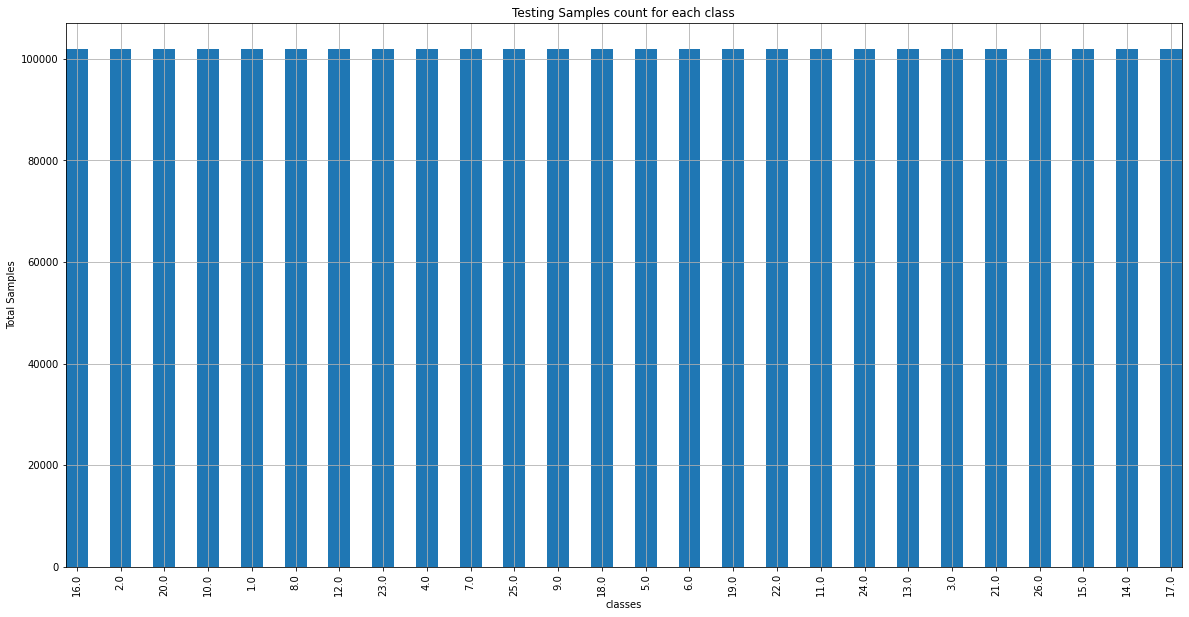

In [86]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [87]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02943,0.03246,1.00000
1,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02942,0.03245,1.00000
2,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
3,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
4,0.03450,0.04516,0.03173,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000


In [88]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [89]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [90]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.40862,-0.38335,-0.31710,-0.19573,-0.20851,-0.25914,-0.23657,-0.25710,1.00000
1,-0.40862,-0.38336,-0.31707,-0.19576,-0.20853,-0.25915,-0.23658,-0.25713,1.00000
2,-0.40861,-0.38336,-0.31704,-0.19579,-0.20853,-0.25916,-0.23659,-0.25717,1.00000
3,-0.40861,-0.38337,-0.31700,-0.19582,-0.20853,-0.25918,-0.23660,-0.25719,1.00000
4,-0.40860,-0.38338,-0.31697,-0.19585,-0.20854,-0.25919,-0.23661,-0.25723,1.00000


In [91]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03051,0.04162,0.02142,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
1,0.03037,0.04162,0.02144,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
2,0.03020,0.04162,0.02145,0.03619,0.03280,0.02426,0.02407,0.03174,1.00000
3,0.03000,0.04162,0.02146,0.03618,0.03280,0.02426,0.02408,0.03174,1.00000
4,0.02982,0.04162,0.02147,0.03617,0.03279,0.02426,0.02408,0.03174,1.00000


In [92]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [93]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.44073,-0.40073,-0.40371,-0.10845,-0.15168,-0.27363,-0.28653,-0.26682,1.00000
1,-0.44187,-0.40073,-0.40361,-0.10855,-0.15175,-0.27362,-0.28651,-0.26683,1.00000
2,-0.44322,-0.40072,-0.40351,-0.10867,-0.15182,-0.27362,-0.28649,-0.26686,1.00000
3,-0.44482,-0.40072,-0.40341,-0.10878,-0.15189,-0.27361,-0.28647,-0.26687,1.00000
4,-0.44625,-0.40072,-0.40331,-0.10889,-0.15196,-0.27361,-0.28644,-0.26689,1.00000


In [94]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.40862 -0.38335 -0.31710 -0.19573 -0.20851 -0.25914 -0.23657   
1       -0.40862 -0.38336 -0.31707 -0.19576 -0.20853 -0.25915 -0.23658   
2       -0.40861 -0.38336 -0.31704 -0.19579 -0.20853 -0.25916 -0.23659   
3       -0.40861 -0.38337 -0.31700 -0.19582 -0.20853 -0.25918 -0.23660   
4       -0.40860 -0.38338 -0.31697 -0.19585 -0.20854 -0.25919 -0.23661   
...          ...      ...      ...      ...      ...      ...      ...   
5303995 -0.37664 -0.35320 -0.29846 -0.13343 -0.26037 -0.29086 -0.21241   
5303996 -0.35513 -0.34917 -0.26169 -0.12629 -0.25887 -0.29087 -0.21223   
5303997 -0.32655 -0.34482 -0.21624 -0.11864 -0.25727 -0.29088 -0.21206   
5303998 -0.30417 -0.34102 -0.17755 -0.11227 -0.25593 -0.29088 -0.21188   
5303999 -0.31013 -0.33858 -0.16242 -0.10900 -0.25523 -0.29089 -0.21170   

              C8  Class_label  ActivityEncoded  
0       -0.25710      1.00000                0  

In [95]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [96]:
# The number of steps within one time segment
TIME_PERIODS = 6000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 6000

In [ ]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)

In [101]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

In [102]:
#x_train = x_train.reshape(x_train.shape[0], input_shape)
# print('x_train shape:', x_train[0].shape)
# print('input_shape:', input_shape)
# print('input_shape[0]',input_shape[0][-1])
# print('input_shape[1]',input_shape[1])
# print('input_shape[-1]',input_shape[-1])
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
New y_train shape:  (883, 26)


In [106]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
# y_test = y_test.astype('float32')
y_test_hot = to_categorical(y_test, num_classes)
print('New y_test shape: ', y_test_hot.shape)

x_test shape:  (441, 6000, 8)
441 testing samples
y_test shape:  (441,)
New y_test shape:  (441, 26)


In [107]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 15, 400
n_depth=8
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (883, 6000, 8)
x_test shape:  (441, 6000, 8)
n_outputs 26


In [158]:
class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention,self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        assert(self.head_dim*heads == embed_size),"embed_size need to be div by heads"
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim,self.head_dim,bias=False)
        self.fc_out = nn.Linear(heads*self.head_dim,embed_size)
    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]
#         split embedding into self.heads pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)
       
        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)
        
        energy = torch.einsum("nqhd,nkhd-->nhqk",[queries,keys])
#       queries shape: (N, query_len, heads, heads_dim)
#       keys shape: (N, key_len, heads, heads_dim)
#       energy shape: (N, heads, query_len, key_len)
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))
        attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3)
        
        out = torch.einsum("nhql,nlhd-->nqhd", [attention, value]).reshape(
        N, query_len, self.heads*self.head_dim)
#       attention shape: (N, heads, query_len, key_len)
#       values shape: (N, value_len, heads, heads_dim)
#       after einsum(N, query_len, heads, head_dim) then flatten last two dimensions
        out = self.fc_out(out)
        return out


In [169]:
class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()
        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion*embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion*embed_size, embed_size)
        )
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, value, key, query, mask):
        attention = self.attention(value, key, query, mask)
        
        x = self.dropout(self.norm1(attention + query))
        forward = self.feed_forward(x)
        out = self.dropout(self.norm2(forward + x))
        return out        

In [170]:
class Encoder(nn.Module):
    def __init__(
        self,
        src_vocab_size,
        embed_size,
        num_layers,
        heads,
        device,
        forward_expansion,
        dropout,
        max_length,
    ):
        super(Encoder, self).__init__()
        self.embed_size = embed_size
        self.device = device
        self.word_embedding = nn.Embedding(src_vocab_size, embed_size)
        self.position_embedding = nn.Embedding(max_length, embed_size)
        
        self.layers = nn.ModuleList(
            [
                TransformerBlock(
                    embed_size,
                    heads,
                    dropout = dropout,
                    forward_expansion = forward_expansion,
                    
                )
                for _ in range(num_layers)]
            )
        self.dropout = nn.Dropout(dropout)
        
    def forward(self,x, mask):
        N, seq_length = x.shape
        positions = torch.arrrange(0, seq_length).expand(N, seq_length).to(self.device)
        
        out = self.dropout(self.word_embedding(x) + self.position_embedding(positions))
        
        for layer in self.layers:
            out = layer(out, out, out, mask)
            
        return out

In [171]:
class DecoderBlock(nn.Module):
    def __init__(self, embed_size, heads,forward_expansion, dropout, device):
        super(DecoderBlock, self).__init__()
        self.attention = SelfAttention(embed_size,heads)
        self.transformer_block = TransformerBlock(
            embed_size, heads, dropout, forward_expansion
        )
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x, value, key, src_mask, trg_mask):
        attention = self.attention(x, x, x, trg_mask)
        query = self.dropout(self.norm(attention + x))
        out =self.transformer_block(value, key, query, src_mask)
        return out        

In [172]:
class Decoder(nn.Module):
    def __init__(self,
                 trg_vocab_size,
                 embed_size,
                 num_layers,
                 heads,
                 forward_expansion,
                 dropout,
                 device,
                 max_length,                 
                ):
        super(Decoder, self).__init__()
        self.device = device
        self.word_embedding = nn.Embedding(trg_vocab_size, embed_size)
        self.position_embedding = nn.Embedding(max_length, embed_size)
        
        self.layers = nn.ModuleList(
            [DecoderBlock(embed_size, heads, forward_expansion, dropout, device)
             for _ in range(num_layers)]
            )
        self.fc_out = nn.Linear(embed_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self,x, enc_out, src_mask, trg_mask):
        N, seq_length = x.shape
        positions = torch.arange(0, seq_length).expand(N, seq_length).to(self.device)
        x = self.dropout((self.word_embedding(x) + self.position_embedding(positions)))
        
        for layer in self.layers:
            x = layer(x, enc_out, enc_out, src_mask, trg_mask)
        
        out =self.fc_out(x)
        return out

In [173]:
class Transformer(nn.Module):
    def __init__(
        self,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        trg_pad_idx,
        embed_size = 256,
        num_layers = 6,
        forward_expansion = 4,
        heads = 8,
        dropout = 0,
        device = "cuda",
        max_length=100
    ):
        super(Transformer, self).__init__()
        
        self.encoder = Encoder(
            src_vocab_size,
            embed_size,
            num_layers,
            heads,
            device,
            forward_expansion,
            dropout,
            max_length
        )
        self.decoder = Decoder(
            trg_vocab_size,
            embed_size,
            num_layers,
            heads,
            device,
            forward_expansion,
            dropout,
            max_length
        )
        
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
#         (N,1,1,src_len)
        return src_mask.to(self.device)

    def make_trg_mask(self, trg):
        N, trg_len = trg.shape
        trg_mask = torch.tril(torch.ones(trg_len,trg_len)).expand(N,1,trg_len,trg_len)
        return trg_mask.to(self.device)
    def forward(self,src,trg):
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        enc_src = self.encoder(src, src_mask)
        out = self.decoder(trg, enc_src, src_mask, trg_mask)
        return out

In [174]:
if __name__== "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    x = torch.tensor([[1,5,6,4,3,9,5,2,0],[1,8,7,3,4,5,6,7,2]]).to(device)
    trg = torch.tensor([[1,7,4,3,5,9,2,0],[1,5,6,2,4,7,6,2]]).to(device)
    
    src_pad_idx = 0
    trg_pad_idx = 0
    src_vocab_size = 10
    trg_vocab_size = 10
    
    model = Transformer(src_vocab_size, trg_vocab_size,src_pad_idx, trg_pad_idx).to(device)
    
    out = model(x,trg[:, :-1])
    print(out.shape)

TypeError: new() received an invalid combination of arguments - got (str, int), but expected one of:
 * (*, torch.device device)
      didn't match because some of the arguments have invalid types: (!str!, !int!)
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, *, torch.device device)
 * (object data, *, torch.device device)


In [100]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [101]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [102]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [103]:
verbose, epochs, batch_size = 0, 150,2

In [104]:
# # olsson architecture
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [105]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/BioPatRec/transformer/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 6000, 8)]    0                                            
__________________________________________________________________________________________________
time2_vector_5 (Time2Vector)    (None, 6000, 2)      24000       input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 6000, 10)     0           input_6[0][0]                    
                                                                 time2_vector_5[0][0]             
__________________________________________________________________________________________________
transformer_encoder_25 (Transfo (None, 6000, 10)     1536        concatenate_5[0][0]        

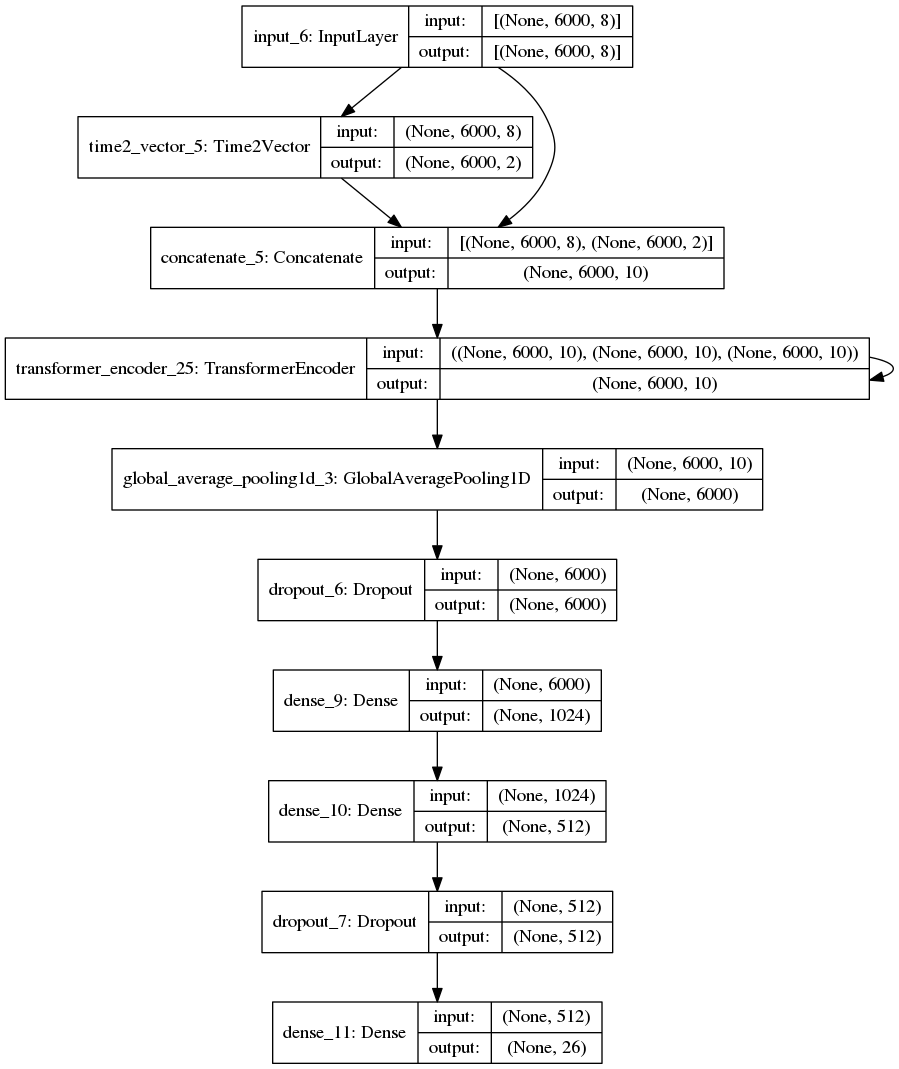

In [106]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/BioPatRec/transformer/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [107]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/transformer/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/150
442/442 [==============================] - 147s 301ms/step - loss: 3.1921 - accuracy: 0.0734 - val_loss: 2.4831 - val_accuracy: 0.2109

Epoch 00001: val_accuracy improved from -inf to 0.21088, saving model to /media/naveen/nav/mat_codes/BioPatRec/transformer/checkpoint.hdf5
Epoch 2/150
442/442 [==============================] - 132s 300ms/step - loss: 2.2001 - accuracy: 0.2770 - val_loss: 3.2397 - val_accuracy: 0.1497

Epoch 00002: val_accuracy did not improve from 0.21088
Epoch 3/150
442/442 [==============================] - 130s 294ms/step - loss: 0.7518 - accuracy: 0.7467 - val_loss: 4.0609 - val_accuracy: 0.1610

Epoch 00003: val_accuracy did not improve from 0.21088
Epoch 4/150
442/442 [==============================] - 131s 296ms/step - loss: 0.1830 - accuracy: 0.9457 - val_loss: 4.0789 - val_accuracy: 0.1882

Epoch 00004: val_accuracy did not improve from 0.21088
Epoch 5/150
442/442 [==============================] - 131s 297ms/step - loss: 0.0310 - accuracy: 0.9880

KeyboardInterrupt: 

In [ ]:
# #     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
# csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
# history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


In [ ]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

In [ ]:
model.save('/media/naveen/nav/mat_codes/BioPatRec/transformer/CNN_LSTM_nina_5X97')

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
BPRa=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= BPRa.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figBPR=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")

ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for BioPatRec DB2',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
figBPR.savefig('/media/naveen/nav/plots/BioPatRec_15X400.eps',transparent=False)
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_20X300.pdf',transparent=False)

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# # naveen architecture
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# # model.add(Flatten())
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.3))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.3))
# # model.add(Flatten())
# # model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# # model.add(Bidirectional(LSTM(200)))
# # model.add(Dropout(0.3))
# model.add(Flatten())
# # model.add(Dense(2000, activation='tanh'))
# model.add(Dense(512, activation='tanh'))
# # model.add(Dense(200, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth,n_sub)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(8,1),strides=(2,1))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [ ]:
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=3,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))